In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data= pd.read_csv(r"C:\Users\mtice\Documents\California.csv")

# Data Structure
After loading the data, we look at the shape of the data, head of the data, and description of the variables. All variables are either Int or Float, except for "ocean_proximity" which is a categorical variable. We notice after looking at the description that "total_bedrooms" has 207 null values as well. 

In [3]:
print(data.shape)

(20640, 10)


In [4]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Visualization
We start with histograms for each numerical variable to spot any abnormalities or other insights. We notice the following:
* The "housing_median_age"

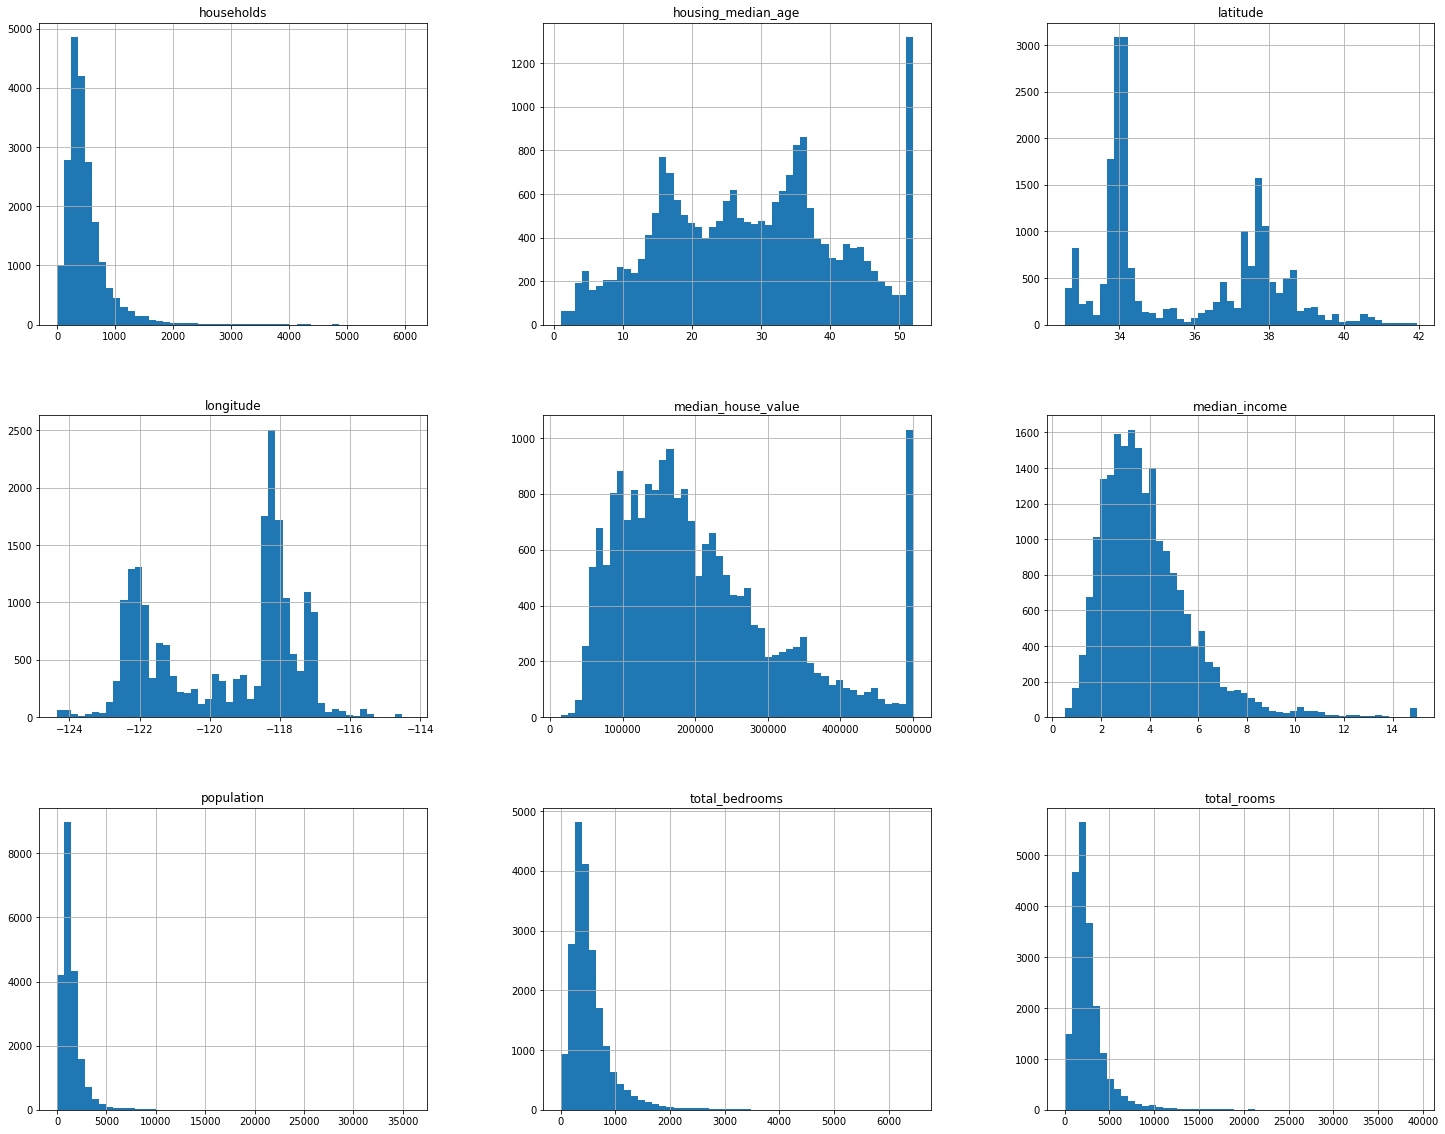

In [7]:
#Now that data cleansing is done, histograms will give solid visualization of the variables
#Observations: All variables are right-tail heavy. Especially median_house_value, housing_median_age.
#We can assume that housing_median_age and median_house_value were capped. These capped values should be removed from the 
#training and test set. 
data.hist(bins=50, figsize=(25,20))
plt.show()

In [8]:
#Create Train and Test Set. Implemented random_state(42) to keep the same shuffled sets each time I run the code. 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(len(train_set), "train ,", len(test_set), "test")

16512 train , 4128 test


In [9]:
#Made copy of training set in order to not change the original training set.
data = train_set.copy()

In [10]:
#There is a possibility of multicollinearity. Correlation to dependent variable and between the variables is needed. 
correlation = data.corr()
correlation['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017405258400>,
      dtype=object)

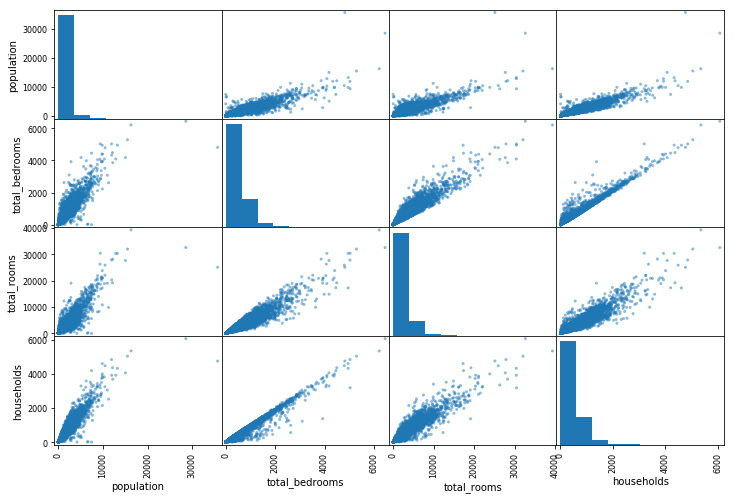

In [11]:
from pandas.plotting import scatter_matrix 
attributes = ['population', 'total_bedrooms', 'total_rooms', 'households']
scatter_matrix(data[attributes], figsize=(12,8))

In [12]:
#There is clear correlation between the variables. Therefore, we can combine them into
data['rooms_per_household'] = data['total_rooms']/data['households']
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000174052782E8>,
      dtype=object)

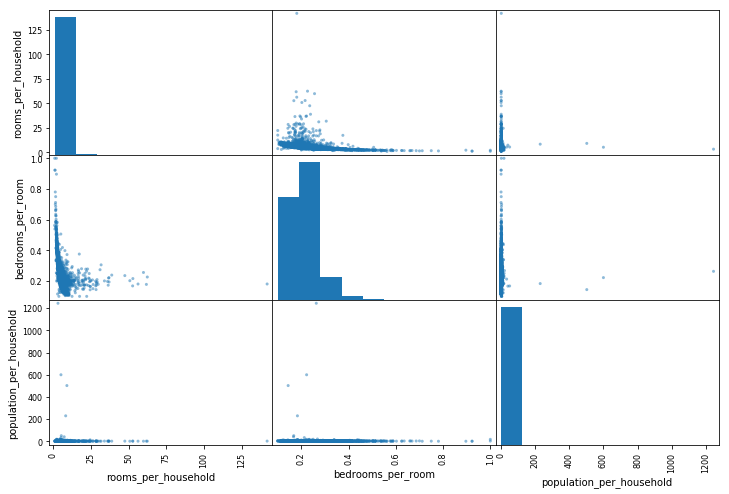

In [13]:
attributes = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']
scatter_matrix(data[attributes], figsize=(12,8))

In [14]:
correlation1 = data.corr()
correlation1['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

In [15]:
data = train_set.drop("median_house_value", axis=1) 
housing_labels = train_set["median_house_value"].copy()

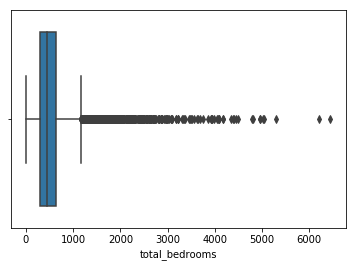

In [16]:
#Before filling in nulls for 'total_bedrooms', checking for outliers.
sb.boxplot(x=data['total_bedrooms'])

In [17]:
#With the large amount of outliers, the median should be used when filling in the null values
median = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median, inplace=True)

In [18]:
#Changing the 'ocean_proximity' variable from categorical to an integer value
from sklearn import preprocessing
housing_cat = data['ocean_proximity']
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_categories

Index(['NEAR OCEAN', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [19]:
#Using OneHotEncoder to convert the category values into vectors EXPLAIN MORE
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
data_num = data.drop('ocean_proximity', axis=1)
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
extra_attribs = attr_adder.transform(data.values)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
data_num_tr = num_pipeline.fit_transform(data_num)

In [22]:
from sklearn.compose import ColumnTransformer
num_attribs = list(data_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)
data_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])